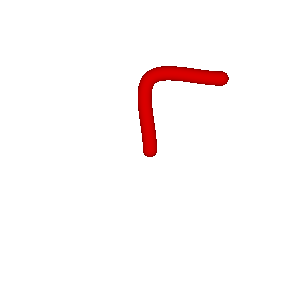

In [3]:
from PIL import Image
import numpy as np

from fdray import (
    Background,
    Camera,
    Color,
    SphereSweep,
    LightSource,
    Renderer,
    Scene,
    Curve,
    Polyline,
)

x = np.array([[0, 0, 0], [0, 0, 1], [0, 1, 1]])

camera = Camera(0, 0, view_scale=2.1, distance=10)
scene = Scene(
    camera,
    Background("white", alpha=0.1),
    LightSource(camera.location, "white"),
    Curve(x, 0.1, "red"),
)
renderer = Renderer(width=300, height=300)
a = renderer.render(scene)
Image.fromarray(a)


In [3]:
print(str(scene))

#version 3.7;
global_settings { assumed_gamma 1 }
camera { location <10, 0, 0> look_at <0, 0, 0> direction <10, 0, 0> right <-0, -4.8497, -0> up <0, 0, 3.6373> sky <0, 0, 1> }
background { rgbt <1, 1, 1, 0.9> }
light_source { <10, 0, 0> color rgb <1, 1, 1> }
sphere_sweep {
  cubic_spline, 6
  <0, 0, -1>, 0.1, <0, 0, 0>, 0.1, <0, 0, 1>, 0.1, <1, 1, 1>, 0.1, <0, 0, 0>, 0.1, <-1, -1, -1>, 0.1
  pigment { rgb <1, 0, 0> }
}


In [4]:
a = SphereSweep(
    "b_spline",
    [(0, 0, 0), (0, 0, 1), (1, 1, 1), (2, 1, 1)],
    0.1,
    "red",
)
print(a.args)
print(a.attrs)


[[(0, 0, 0), (0, 0, 1), (1, 1, 1), (2, 1, 1)], 0.1, 'b_spline']


In [5]:
b = a.translate(0, 0, 1)
print(b.args)
print(b.attrs)


[0.1, 'b_spline', [(0, 0, 0), (0, 0, 1), (1, 1, 1), (2, 1, 1)]]
[<fdray.colors.Color object at 0x7fd74047ae90>, Transform(scale=None, rotate=None, translate=(0, 0, 1))]


In [4]:
a = Curve(x, 0.1, "red")
a.args

[[(np.int64(0), np.int64(0), np.int64(-1)),
  array([0, 0, 0]),
  array([0, 0, 1]),
  array([1, 1, 1]),
  array([0, 0, 0]),
  (np.int64(-1), np.int64(-1), np.int64(-1))],
 0.1]